## 1.0 Boostrap

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data.

In [1]:
library(boot) # to get boostrap 
library(lmtest)
library(sandwich)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [58]:
## loading the data
Penn <- as.data.frame(read.table("../../../data/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==4 | tg==0)
Penn$T4 <- tg
attach(Penn)

The following object is masked _by_ .GlobalEnv:

    T4


The following objects are masked from Penn (pos = 3):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, T4, tg


The following objects are masked from Penn (pos = 4):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from Penn (pos = 5):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg




In [59]:
Penn$T4 <- replace(T4, T4 == 4, 1)

In [60]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,10824,0,18,18,0,0,0,0,2,0,⋯,0,0,0,0,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
5,10747,0,27,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
12,10607,4,9,9,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,1
13,10831,0,27,27,0,0,0,0,1,0,⋯,0,0,0,1,1,0,1,0,0,0
14,10845,0,27,27,1,0,0,0,0,0,⋯,0,0,0,1,0,0,1,0,0,0


In [61]:
boot.fn <- function(data, index)
  coef(lm(log(inuidur1) ~ T4+female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd, data = data, subset = index))

In [62]:
set.seed(1)
reg_lineal = boot(Penn, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  1.158480e-03  0.15440645
t2*  -0.071692484 -3.524273e-04  0.03557456
t3*   0.126368328  8.394803e-04  0.03516956
t4*  -0.293767980  5.101116e-04  0.06033968
t5*  -0.472445058 -5.488755e-03  0.24363226
t6*   0.029866899  7.606843e-04  0.05553680
t7*   0.096186517 -1.161955e-03  0.04527565
t8*   0.073678072 -1.130668e-03  0.15201926
t9*  -0.038506537 -4.256760e-04  0.14967519
t10* -0.054949195 -8.952685e-04  0.15070895
t11* -0.144177912 -1.587659e-03  0.14981234
t12*  0.003361318 -3.816678e-03  0.16107836
t13* -0.162772168  1.778627e-03  0.03822653
t14*  0.229666708  2.239486e-04  0.05818025
t15*  0.126557359  1.210092e-05  0.04855636
t16* -0.175352572 -6.636363e-04  0.04096754
t17* -0.105224727 -7.223598e-04  0.04517278

## 2.0 Comparative models 

In [49]:
library(hdm)

In [50]:
data(cps2012)

data <- cps2012

In [51]:
str(cps2012) # info from dataframe

'data.frame':	29217 obs. of  23 variables:
 $ year        : num  2012 2012 2012 2012 2012 ...
 $ lnw         : num  1.91 1.37 2.54 1.8 3.35 ...
 $ female      : num  1 1 0 1 0 0 0 0 0 1 ...
 $ widowed     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ divorced    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ separated   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nevermarried: num  0 0 0 0 0 0 1 0 0 0 ...
 $ hsd08       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsd911      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ hsg         : num  0 0 1 1 0 1 1 0 0 0 ...
 $ cg          : num  0 0 0 0 1 0 0 0 1 0 ...
 $ ad          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ exp1        : num  22 30 19 14 15 23 33 23.5 15 15.5 ...
 $ exp2        : num  4.84 9 3.61 1.96 2.25 ...
 $ exp3        : num  10.65 27 6.86 2.74 3.38 ...
 $ exp4        : num  23.43 81 13.03 3.84 5.06 ...
 $ weight      : num  569 626 264 257 257 ...
 $ 

In [52]:
set.seed(1234)

training <- sample(nrow(data), nrow(data)*(3/4), replace=FALSE)

data_train <- data[training,]
data_test <- data[-training,]

We construct the two different model matrices $X_{basic}$ and $X_{flex}$ for both the training and the test sample:

In [53]:
X_basic <-  "female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"

X_flex <- "female + female:(widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed +
divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +
we + exp1 + exp2 + exp3)^2"

formula_basic <- as.formula(paste("lnw", "~", X_basic))
formula_flex <- as.formula(paste("lnw", "~", X_flex))

model_X_basic_train <- model.matrix(formula_basic,data_train)
model_X_basic_test <- model.matrix(formula_basic,data_test)

model_X_flex_train <- model.matrix(formula_flex,data_train)
model_X_flex_test <- model.matrix(formula_flex,data_test)

model_X_basic_train <- model_X_basic_train[ , which(apply(model_X_basic_train, 2, var) != 0)]
model_X_basic_test <- model_X_basic_test[ , which(apply(model_X_basic_test, 2, var) != 0)]
model_X_flex_train <- model_X_flex_train[ , which(apply(model_X_flex_train, 2, var) != 0)]
model_X_flex_test <- model_X_flex_test[ , which(apply(model_X_flex_test, 2, var) != 0)]# exclude all constant variables

p_basic <- dim(model_X_basic_train)[2]
p_flex <- dim(model_X_flex_train)[2]

In [54]:
Y_train <- data_train$lnw
Y_test <- data_test$lnw

In [55]:
p_basic
p_flex

[1] 16

[1] 116

### 2.1 OLS

We fit the basic model to our training data by running an ols regression and compute the mean squared error on the test sample.

In [56]:
# ols (basic model)
fit.lm.basic <- lm(formula_basic, data_train)
fit.lm.basic


Call:
lm(formula = formula_basic, data = data_train)

Coefficients:
        (Intercept)               female       female:widowed  
            2.91033             -0.71193             -0.10023  
    female:divorced     female:separated  female:nevermarried  
           -0.01400             -0.08382             -0.02270  
       female:hsd08        female:hsd911           female:hsg  
           -0.74701             -0.51944             -0.17263  
          female:cg            female:ad            female:mw  
            0.36295              0.60386             -0.10492  
          female:so            female:we          female:exp1  
           -0.05738             -0.01726              0.04753  
        female:exp2          female:exp3  
           -0.20025              0.02943  


In [57]:
# Compute the Out-Of-Sample Performance
yhat.lm.basic <- predict(fit.lm.basic, newdata=data_test)
MSE.lm.basic <- summary(lm((Y_test-yhat.lm.basic)^2~1))$coef[1:2]
R2.lm.basic <- 1-MSE.lm.basic[1]/var(Y_test)  

In [58]:
# ols (flexible model)
fit.lm.flex <- lm(formula_flex, data_train) 

# Compute the Out-Of-Sample Performance
options(warn=-1)

yhat.lm.flex <- predict(fit.lm.flex, newdata=data_test)
MSE.lm.flex <- summary(lm((Y_test-yhat.lm.flex)^2~1))$coef[1:2]

R2.lm.flex <- 1-MSE.lm.flex[1]/var(Y_test)

We observe that ols regression works better for the basic model with smaller $p/n$ ratio. We are proceeding by running lasso regressions and its versions.

### 2.2 Lasso, Ridge and Elastic Net


Considering the basic model, we run a lasso/post-lasso regression first and then we compute the measures for the out-of-sample performance. Note that applying the package *hdm* and the function *rlasso* we rely on a theoretical based choice of the penalty level $\lambda$ in the lasso regression.

In [59]:
# lasso and versions
library(hdm) 
fit.rlasso  <- rlasso(formula_basic, data_train, post=FALSE)
fit.rlasso.post <- rlasso(formula_basic, data_train, post=TRUE)

yhat.rlasso   <- predict(fit.rlasso, newdata=data_test)
yhat.rlasso.post   <- predict(fit.rlasso.post, newdata=data_test)

MSE.lasso <- summary(lm((Y_test-yhat.rlasso)^2~1))$coef[1:2]
MSE.lasso.post <- summary(lm((Y_test-yhat.rlasso.post)^2~1))$coef[1:2]

R2.lasso <- 1-MSE.lasso[1]/var(Y_test)
R2.lasso.post <- 1-MSE.lasso.post[1]/var(Y_test)

Now, we repeat the same procedure for the flexible model.

In [60]:
fit.rlasso.flex  <- rlasso(formula_flex, data_train, post=FALSE)
fit.rlasso.post.flex <- rlasso(formula_flex, data_train, post=TRUE)
yhat.rlasso.flex   <- predict(fit.rlasso.flex, newdata=data_test)
yhat.rlasso.post.flex   <- predict(fit.rlasso.post.flex, newdata=data_test)

In [61]:
fit.rlasso.flex  <- rlasso(formula_flex, data_train, post=FALSE)
fit.rlasso.post.flex <- rlasso(formula_flex, data_train, post=TRUE)
yhat.rlasso.flex   <- predict(fit.rlasso.flex, newdata=data_test)
yhat.rlasso.post.flex   <- predict(fit.rlasso.post.flex, newdata=data_test)

MSE.lasso.flex <- summary(lm((Y_test-yhat.rlasso.flex)^2~1))$coef[1:2]
MSE.lasso.post.flex <- summary(lm((Y_test-yhat.rlasso.post.flex)^2~1))$coef[1:2]

R2.lasso.flex <- 1-MSE.lasso.flex[1]/var(Y_test)
R2.lasso.post.flex <- 1-MSE.lasso.post.flex[1]/var(Y_test) 

It is worth to notice that lasso regression works better for the more complex model.

In contrast to a theoretical based choice of the tuning parameter $\lambda$ in the lasso regression, we can also use cross-validation to determine the penalty level by applying the package *glmnet* and the function cv.glmnet. In this context, we also run a ridge and a elastic net regression by adjusting the parameter *alpha*.

In [62]:
library(glmnet)
fit.lasso.cv   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=1)
fit.ridge   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=0)
fit.elnet   <- cv.glmnet(model_X_basic_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv    <- predict(fit.lasso.cv, newx = model_X_basic_test)
yhat.ridge   <- predict(fit.ridge, newx = model_X_basic_test)
yhat.elnet   <- predict(fit.elnet, newx = model_X_basic_test)

MSE.lasso.cv <- summary(lm((Y_test-yhat.lasso.cv)^2~1))$coef[1:2]
MSE.ridge <- summary(lm((Y_test-yhat.ridge)^2~1))$coef[1:2]
MSE.elnet <- summary(lm((Y_test-yhat.elnet)^2~1))$coef[1:2]

R2.lasso.cv <- 1-MSE.lasso.cv[1]/var(Y_test)
R2.ridge <- 1-MSE.ridge[1]/var(Y_test)
R2.elnet <- 1-MSE.elnet[1]/var(Y_test)


Loading required package: Matrix

Loaded glmnet 4.1-4



R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.08193926 0.09136083 0.08870976

Note that the following calculations for the flexible model need some computation time.

In [65]:
fit.lasso.cv.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=1)
fit.ridge.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=0)
fit.elnet.flex   <- cv.glmnet(model_X_flex_train, Y_train, family="gaussian", alpha=.5)

yhat.lasso.cv.flex    <- predict(fit.lasso.cv.flex , newx = model_X_flex_test)
yhat.ridge.flex    <- predict(fit.ridge.flex , newx = model_X_flex_test)
yhat.elnet.flex    <- predict(fit.elnet.flex , newx = model_X_flex_test)

MSE.lasso.cv.flex  <- summary(lm((Y_test-yhat.lasso.cv.flex )^2~1))$coef[1:2]
MSE.ridge.flex  <- summary(lm((Y_test-yhat.ridge.flex )^2~1))$coef[1:2]
MSE.elnet.flex  <- summary(lm((Y_test-yhat.elnet.flex )^2~1))$coef[1:2]

R2.lasso.cv.flex  <- 1-MSE.lasso.cv.flex [1]/var(Y_test)
R2.ridge.flex  <- 1-MSE.ridge.flex [1]/var(Y_test)
R2.elnet.flex  <- 1-MSE.elnet.flex [1]/var(Y_test)



The performance of the lasso regression with cross-validated penalty is quite similar to the performance of lasso using a theoretical based choice of the tuning parameter.

## Non-linear models

Besides linear regression models, we consider nonlinear regression models to build a predictive model. We are applying regression trees, random forests, boosted trees and neural nets to estimate the regression function $g(X)$. First, we load the relevant libraries

In [66]:
library(randomForest)
library(rpart)
library(nnet)
library(gbm)
library(rpart.plot)
library(keras)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loaded gbm 2.1.8



In [3]:
#install.packages("randomForest")
#install.packages("gbm")
#install.packages("keras")

and we illustrate the application of regression trees.

### Regression Trees

In [72]:
X_basic <-  "female + widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3"

formula_basic <- as.formula(paste("lnw", "~", X_basic))

In [73]:
# Add penalization to prune tree

fit.trees <- rpart(formula_basic, data_train, cp = 0.001)

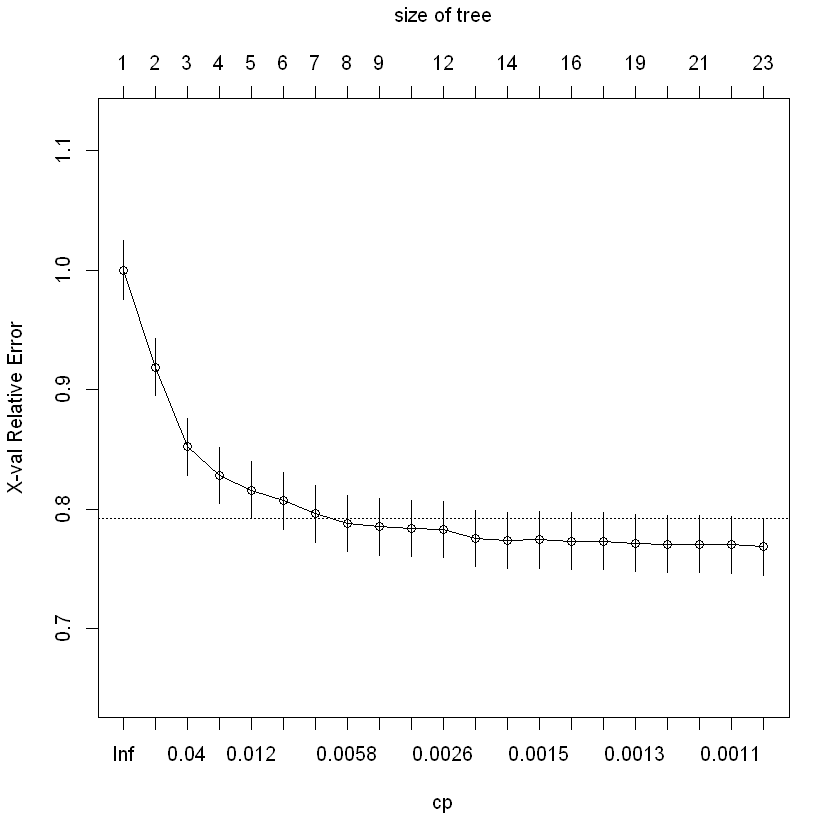

In [74]:
plotcp(fit.trees)

In [75]:
fit.trees$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.081430568,0,1.0000000,1.0002037,0.02439782
2,0.066583565,1,0.9185694,0.9189609,0.02396618
3,0.023898064,2,0.8519859,0.8523982,0.02370871
4,0.012678659,3,0.8280878,0.8285399,0.02356942
5,0.010605052,4,0.8154091,0.8161512,0.02367272
6,0.009387934,5,0.8048041,0.8070745,0.02375306
7,0.007983296,6,0.7954162,0.7962691,0.02362839
8,0.004177217,7,0.7874329,0.7883533,0.02355229
9,0.002648821,8,0.7832556,0.7852669,0.02353560
10,0.002615364,10,0.7779580,0.7837859,0.02358478


In [76]:
which.min(fit.trees$cptable[,"xerror"])

21 
21

In [77]:
bestcp<- fit.trees$cptable[which.min(fit.trees$cptable[,"xerror"]),"CP"]
bestcp

[1] 0.001

Now, we can prune the tree and visualize the prediction rule.

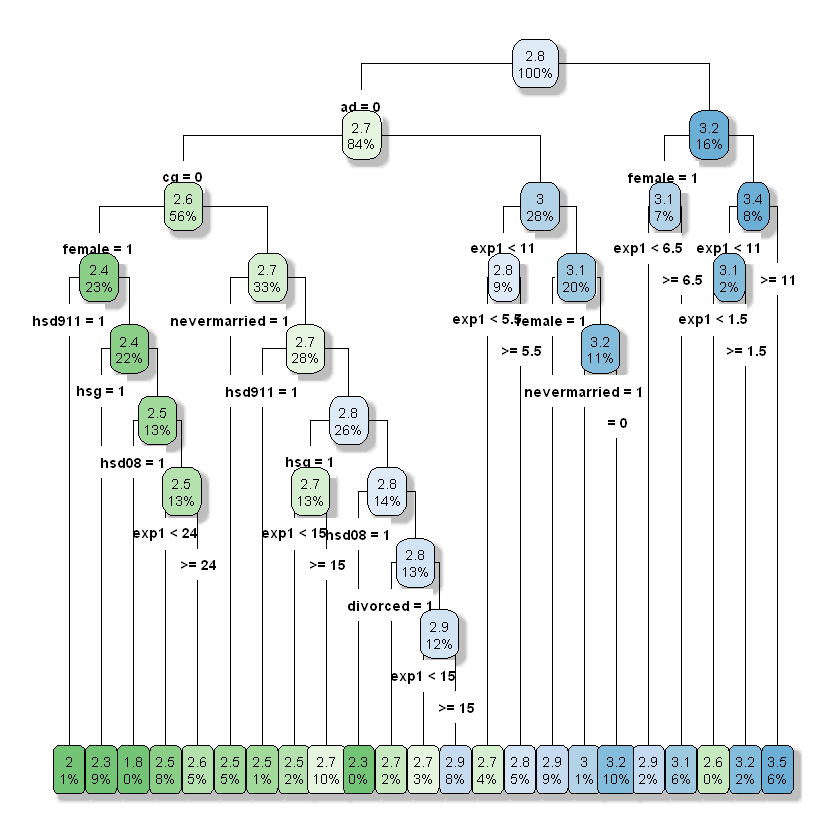

In [78]:
fit.prunedtree <- prune(fit.trees, cp=bestcp)


plot1 <- rpart.plot(fit.prunedtree,leaf.round=1, space=1, yspace=1.5, split.space=1, shadow.col = "gray", type =4,
          branch = 1, box.palette="GnBu", cex = 0.7)


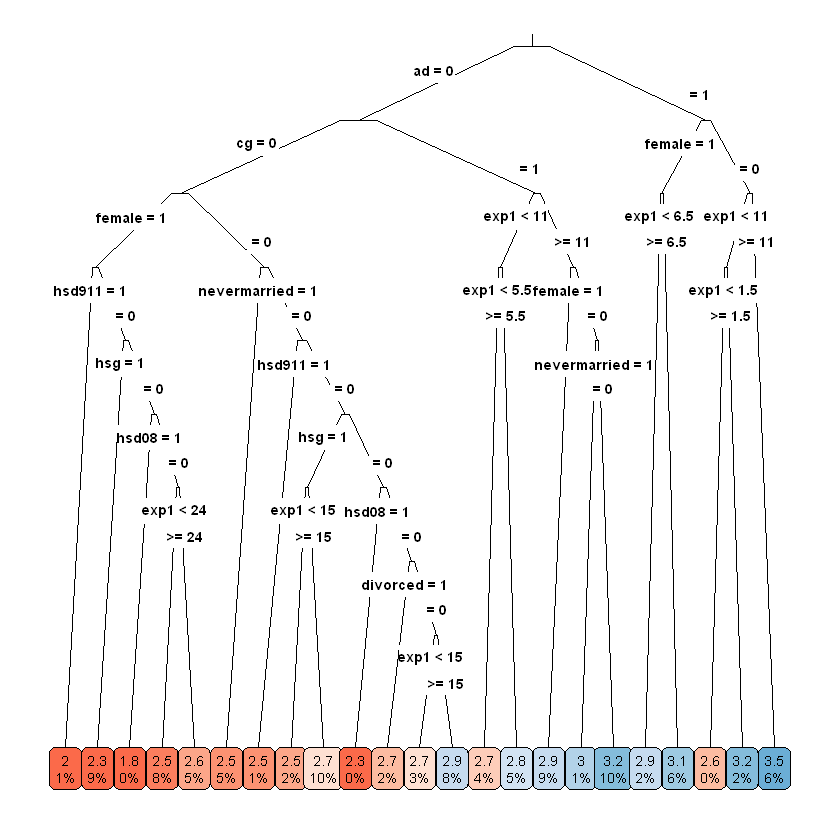

In [79]:
fit.prunedtree <- prune(fit.trees, cp=bestcp)
plot1 <- rpart.plot(fit.prunedtree,type =3, fallen = TRUE, leaf.round=1, extra = 100, branch = 0.1, box.palette="RdBu",cex = 0.7)

In [80]:
yhat.pt <- predict(fit.prunedtree,newdata=data_test)

MSE.pt <- summary(lm((Y_test-yhat.pt)^2~1))$coef[1:2]
R2.pt  <- 1-MSE.pt[1]/var(Y_test)

# R^2 of the pruned tree
cat("R^2 of the pruned tree:",R2.pt)

R^2 of the pruned tree: 0.2135014

## Results

In [81]:
library(xtable)
table<- matrix(0, 13, 3)
table[1,1:2]   <- MSE.lm.basic
table[2,1:2]   <- MSE.lm.flex
table[3,1:2]   <- MSE.lasso
table[4,1:2]   <- MSE.lasso.post
table[5,1:2]   <- MSE.lasso.flex
table[6,1:2]   <- MSE.lasso.post.flex
table[7,1:2]   <- MSE.lasso.cv
table[8,1:2]   <- MSE.ridge
table[9,1:2]   <- MSE.elnet
table[10,1:2]   <- MSE.lasso.cv.flex
table[11,1:2]  <- MSE.ridge.flex
table[12,1:2]  <- MSE.elnet.flex
table[13,1:2]  <- MSE.pt



table[1,3]   <- R2.lm.basic
table[2,3]   <- R2.lm.flex
table[3,3]   <- R2.lasso
table[4,3]   <- R2.lasso.post
table[5,3]   <- R2.lasso.flex
table[6,3]   <- R2.lasso.post.flex
table[7,3]   <- R2.lasso.cv
table[8,3]   <- R2.ridge
table[9,3]   <- R2.elnet
table[10,3]   <- R2.lasso.cv.flex
table[11,3]  <- R2.ridge.flex
table[12,3]  <- R2.elnet.flex
table[13,3]  <- R2.pt




colnames(table)<- c("MSE", "S.E. for MSE", "R-squared")
rownames(table)<- c("Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", 
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)",
                    "Cross-Validated elnet (flexible)", "Pruned Tree")
tab <- xtable(table, digits =3)
print(tab,type="latex") # set type="latex" for printing table in LaTeX
tab

% latex table generated in R 4.2.0 by xtable 1.8-4 package
% Thu Jul  7 18:00:21 2022
\begin{table}[ht]
\centering
\begin{tabular}{rrrr}
  \hline
 & MSE & S.E. for MSE & R-squared \\ 
  \hline
Least Squares (basic) & 0.395 & 0.021 & 0.110 \\ 
  Least Squares (flexible) & 0.342 & 0.022 & 0.229 \\ 
  Lasso & 0.397 & 0.021 & 0.106 \\ 
  Post-Lasso & 0.398 & 0.021 & 0.104 \\ 
  Lasso (flexible) & 0.343 & 0.022 & 0.227 \\ 
  Post-Lasso (flexible) & 0.344 & 0.022 & 0.225 \\ 
  Cross-Validated lasso & 0.408 & 0.022 & 0.082 \\ 
  Cross-Validated ridge & 0.403 & 0.021 & 0.091 \\ 
  Cross-Validated elnet & 0.405 & 0.022 & 0.089 \\ 
  Cross-Validated lasso (flexible) & 0.350 & 0.022 & 0.211 \\ 
  Cross-Validated ridge (flexible) & 0.350 & 0.022 & 0.212 \\ 
  Cross-Validated elnet (flexible) & 0.348 & 0.022 & 0.217 \\ 
  Pruned Tree & 0.349 & 0.022 & 0.214 \\ 
   \hline
\end{tabular}
\end{table}


,MSE,S.E. for MSE,R-squared
,<dbl>,<dbl>,<dbl>
Least Squares (basic),0.3949444,0.02139802,0.11027552
Least Squares (flexible),0.3423686,0.02190621,0.22871739
Lasso,0.3967288,0.02138493,0.10625575
Post-Lasso,0.3976201,0.02136825,0.10424775
Lasso (flexible),0.3430529,0.02178983,0.22717587
Post-Lasso (flexible),0.3442185,0.02183370,0.22455004
Cross-Validated lasso,0.4075228,0.02155850,0.08193926
Cross-Validated ridge,0.4033406,0.02146692,0.09136083
Cross-Validated elnet,0.4045174,0.02152162,0.08870976
